In [284]:
# import libraties
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [285]:
# Reading beer_data file
beer_data = pd.read_csv('beer_data.csv', encoding='latin-1')

In [286]:
beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


### 1. Data Preparation

Percentage of missing values

In [287]:
# number of observations: 475984
beer_data.shape

(475984, 3)

In [288]:
df_beer = round(100*(beer_data.isnull().sum()/len(beer_data.index)), 2)
df_beer.sort_values(ascending=False)

review_profilename    0.02
review_overall        0.00
beer_beerid           0.00
dtype: float64

In [289]:
#Lets drop the rows as missing values are less then 2%
beer_data.dropna(inplace = True)

In [290]:
beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


#### Understanding the Data Dictionary

In [291]:
beer_data['review_overall'].value_counts()

4.0    174783
4.5     97327
3.5     90785
3.0     49513
5.0     27172
2.5     17587
2.0     11606
1.5      3816
1.0      3289
0.0         6
Name: review_overall, dtype: int64

In [292]:
# check the unique values
beer_data.beer_beerid.nunique()

40304

In [293]:
beer_data.review_overall.nunique()

10

In [294]:
beer_data.review_profilename.nunique()

22497

In [295]:
#check the duplicate values
beer_data.duplicated().sum()

580

In [296]:
#show the duplicate rows
beer_data[beer_data.duplicated(keep=False)]

,beer_beerid,review_profilename,review_overall
2300,73647,barleywinefiend,4.5
2301,73647,barleywinefiend,4.5
2348,14243,northyorksammy,2.5
2349,14243,northyorksammy,2.5
2607,1122,Slatetank,4.0
2608,1122,Slatetank,4.0
3262,962,RedDiamond,3.5
3295,962,RedDiamond,3.5
3331,961,Offa,4.0
3338,961,Offa,4.0


In [297]:
#Remove the duplicates
beer_data.drop_duplicates(keep = 'first', inplace = True)

In [298]:
#check the duplicate values
beer_data.duplicated().sum()

0

## 1.1 Choose only those beers that have at least N number of reviews.
Figure out an appropriate value of N using EDA; this may not have one correct answer, but you should not choose beers that have an extremely low number of ratings.

In [299]:
beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [300]:
#count the count of reviews for each beer id
review_count_df = beer_data.groupby('beer_beerid').review_overall.count().to_frame('reviews_count').sort_values(by = "reviews_count", ascending = False)

In [301]:
review_count_df.head()

,reviews_count
beer_beerid,
2093,980
412,972
1904,903
1093,845
92,817


In [302]:
review_count_df.reset_index(inplace=True)
review_count_df.head()

,beer_beerid,reviews_count
0,2093,980
1,412,972
2,1904,903
3,1093,845
4,92,817


In [303]:
#which beerid have most reviews
review_count_df.sort_values('reviews_count',ascending=True)

,beer_beerid,reviews_count
40303,77317,1
28267,67171,1
28266,67047,1
28265,7730,1
28264,67045,1
28263,66943,1
28262,66944,1
28261,66945,1
28260,66947,1
28259,66949,1


So many beer ids ratings are less, lets explore more

In [304]:
# there are 40k beer ids for which reviews are present, now need to check on what basic the review count threshold can be decided
review_count_df['reviews_count'].value_counts()

1      18066
2       6188
3       3072
4       1906
5       1344
6        963
7        785
8        560
9        474
10       406
11       389
12       339
13       294
14       259
15       240
19       213
16       206
17       182
18       162
20       149
24       140
21       140
23       124
22       114
28       103
25        99
29        87
26        87
27        83
33        75
       ...  
551        1
519        1
423        1
391        1
409        1
280        1
233        1
425        1
395        1
396        1
364        1
268        1
236        1
373        1
437        1
501        1
757        1
715        1
299        1
553        1
278        1
438        1
522        1
490        1
426        1
362        1
234        1
279        1
311        1
575        1
Name: reviews_count, Length: 442, dtype: int64

In [305]:
#copy thc counts into datafram
review_count_df_total = review_count_df.reviews_count.value_counts().to_frame().reset_index()
review_count_df_total.columns = ['reviews_given','total_count_beer_ids']

In [306]:
review_count_df_total.head(30)

,reviews_given,total_count_beer_ids
0,1,18066
1,2,6188
2,3,3072
3,4,1906
4,5,1344
5,6,963
6,7,785
7,8,560
8,9,474
9,10,406


In [307]:
# it can be seen that around 18k beer ids got 1 review, lets calculate the perentage also
review_count_df_total['percentage_beer_ids'] = (review_count_df_total['total_count_beer_ids']*100)/review_count_df_total.total_count_beer_ids.sum()

In [308]:
review_count_df_total.head()

,reviews_given,total_count_beer_ids,percentage_beer_ids
0,1,18066,44.824335
1,2,6188,15.353315
2,3,3072,7.622072
3,4,1906,4.729059
4,5,1344,3.334657


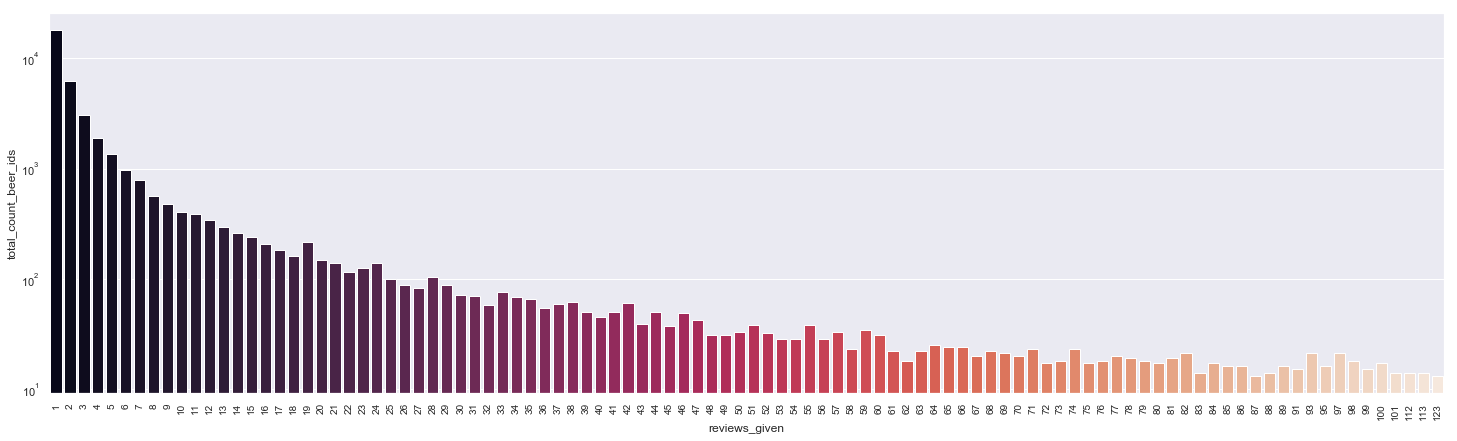

In [309]:
# plot bar graph
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=review_count_df_total[0:100].reviews_given, y=review_count_df_total[0:200].total_count_beer_ids, palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax

### It can be seen that maximum percentage of beer ids contains minimum review are in large percentage

no need to consider the beer which has less reviews further explore with reviewer profile name

In [310]:
review_count_profile = beer_data.groupby('review_profilename').review_overall.count().to_frame('reviews_count').sort_values(by = "reviews_count", ascending = False)


In [311]:
review_count_profile.reset_index(inplace=True)
review_count_profile.head()

,review_profilename,reviews_count
0,northyorksammy,1844
1,mikesgroove,1377
2,BuckeyeNation,1337
3,Thorpe429,1072
4,ChainGangGuy,1046


In [312]:
review_count_profile_explore = review_count_profile.reviews_count.value_counts().to_frame().reset_index()

In [313]:
review_count_profile_explore.columns = ['reviews_given','total_user_profiles']

In [314]:
review_count_profile_explore['percentage_users'] = (review_count_profile_explore['total_user_profiles']*100)/review_count_profile_explore.total_user_profiles.sum()

In [315]:
review_count_profile_explore.head()

,reviews_given,total_user_profiles,percentage_users
0,1,7976,35.453616
1,2,2948,13.103969
2,3,1621,7.205405
3,4,1108,4.925101
4,5,841,3.738276


The maximum percenatge of beers in the dataset have rating 1 i.e. 35% beers

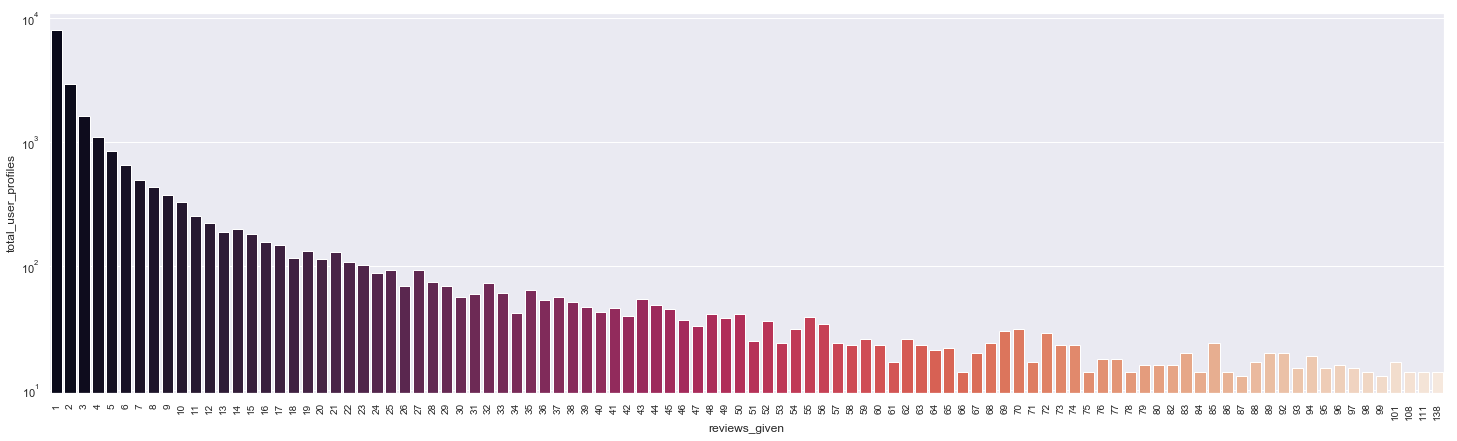

In [316]:
# plot bar graph
sns.set(rc={'figure.figsize':(25,7)})
ax = sns.barplot(x=review_count_profile_explore[0:100].reviews_given, y=review_count_profile_explore[0:200].total_user_profiles, palette="rocket")
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=10)
ax

### From both the graph can be seen that user_profiles or total_beer_ids keeps decreasing with the reviews as we need to reommend the best beers so can take the N as 27 as after that the reviews and total user and beer ids are not decreasing in higher rate

In [317]:
# choose N=27 for both beerids and user profiles as the beers should have atleast 27 reviews and users also rated atleast 27 
# beers

In [318]:
beer_id_final = review_count_df.loc[review_count_df.reviews_count>=27].beer_beerid.to_frame('beer_beerid')
users_profile_final = review_count_profile.loc[review_count_profile.reviews_count>=27].review_profilename.to_frame('review_profilename')

In [319]:
ratings_final = pd.merge(beer_data, beer_id_final, how='inner', on='beer_beerid')
ratings_final = pd.merge(ratings_final, users_profile_final, how='inner', on='review_profilename')

In [320]:
ratings_final.head()

,beer_beerid,review_profilename,review_overall
0,436,Brent,3.0
1,10784,Brent,4.0
2,10785,Brent,4.0
3,16074,Brent,4.0
4,33644,Brent,4.0


## 2. Data exploration

## 2.1 What are the unique values of ratings?

In [321]:
ratings_final.review_overall.value_counts()

4.0    105988
4.5     59634
3.5     52698
3.0     26598
5.0     14828
2.5      8846
2.0      5597
1.5      1686
1.0      1375
Name: review_overall, dtype: int64

In [322]:
np.sort(ratings_final.review_overall.unique())

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

The unique values of ratings are : 1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0

## 2.2 Visualise the rating values and notice:

### 2.2.1 The average beer ratings

In [323]:
ratings_final.groupby('beer_beerid').review_overall.mean().mean()

3.7789511470116075

In [324]:
ratings_final.groupby('beer_beerid').review_overall.mean()

beer_beerid
5        3.532258
6        3.705128
7        3.274510
9        3.344828
10       3.865591
11       3.240741
14       3.932692
15       3.804348
17       3.422043
19       4.004000
23       3.983333
30       4.090028
31       3.965251
32       4.034091
33       4.123037
34       4.246575
36       4.130081
39       4.320588
50       3.375000
54       3.685484
55       3.954545
56       3.460000
58       3.966667
59       4.227273
61       4.103093
63       4.075597
65       2.792727
66       2.500000
67       3.726190
69       3.608333
           ...   
71405    3.607143
71419    4.096774
71654    3.573529
71758    3.681818
71774    3.636364
71919    3.811111
71969    4.126984
72138    4.167857
72373    3.800000
72412    3.277778
72465    4.416667
72762    3.620000
73131    3.728070
73139    3.604167
73289    3.357143
73544    4.068966
73864    3.775000
74123    3.697674
74272    3.642857
74321    3.322581
74323    3.915254
74390    3.696078
74530    4.000000
74548    3.75609

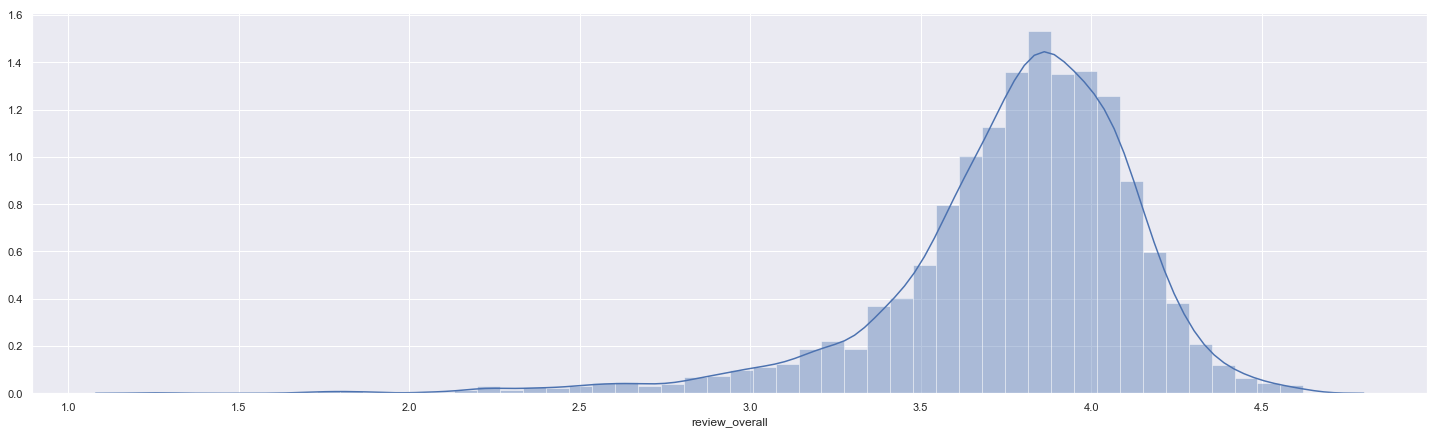

In [325]:
#plot the average review group by beer ids
sns.distplot(ratings_final.groupby('beer_beerid').review_overall.mean())

Average Rating for Beers is showing mean near to 4

### 2.2.2 The average user ratings

In [326]:
ratings_final.groupby('review_profilename').review_overall.mean().mean()

3.861789847533262

In [327]:
ratings_final.groupby('review_profilename').review_overall.mean()

review_profilename
0110x011           4.343750
05Harley           4.132353
100floods          4.069444
1759Girl           3.663043
1Adam12            3.750000
1fastz28           3.845455
321jeff            4.321429
32hoss32           3.774194
3Vandoo            3.826531
4000qtrap          3.682927
4DAloveofSTOUT     3.957627
51mmz0rz           4.104651
57md               3.770833
7ways              3.419355
86sportster883     4.000000
99bottles          3.967105
9InchNails         3.537975
ABOWMan            3.660714
AChamberlain       3.906250
ADR                3.653704
ADZA               3.947826
AEK                4.032258
AJacob81           4.250000
AKBelgianBeast     4.194872
ALESwhatCURESya    3.814607
ATLbeerDog         3.756757
ATPete             3.860902
AWolfAtTheDoor     3.825000
AaronHomoya        3.830986
AaronRed           4.231343
                     ...   
yeagerbm           3.970588
yeahnatenelson     3.649682
yeastsipper        3.788462
yelterdow          3.704698
y

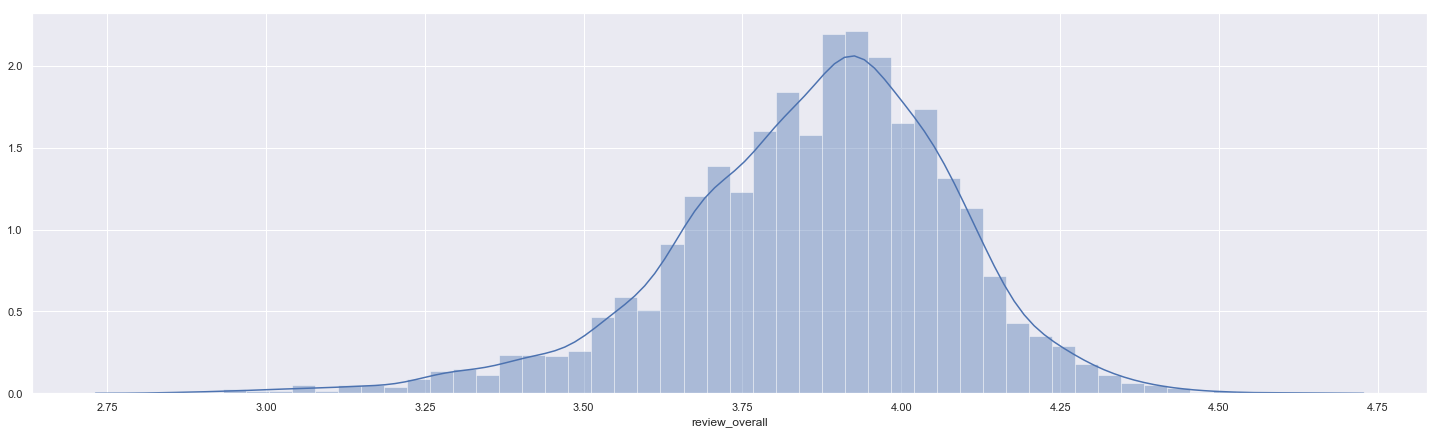

In [328]:
#Plot the distribution count for profiles
sns.distplot(ratings_final.groupby('review_profilename').review_overall.mean())

Average Rating for users is showing mean near to 4

### 2.2.3 The average number of ratings given to the beers

In [329]:
review_count_df.head()

,beer_beerid,reviews_count
0,2093,980
1,412,972
2,1904,903
3,1093,845
4,92,817


In [330]:
ratings_final.groupby('beer_beerid').review_overall.count()

beer_beerid
5         93
6        195
7        153
9         29
10       186
11        27
14        52
15        46
17       186
19       125
23        30
30       361
31       259
32        44
33       382
34       511
36       123
39       340
50        24
54        62
55        66
56        25
58       135
59       253
61       291
63       377
65       275
66        32
67        84
69        60
        ... 
71405     70
71419     31
71654     34
71758     44
71774     44
71919     45
71969     63
72138    140
72373     25
72412     18
72465     30
72762     25
73131     57
73139     24
73289     28
73544     29
73864     20
74123     43
74272     42
74321     31
74323     59
74390     51
74530     43
74548     41
74579     42
74827     35
74904     28
74986     94
75013     29
75086     65
Name: review_overall, Length: 3403, dtype: int64

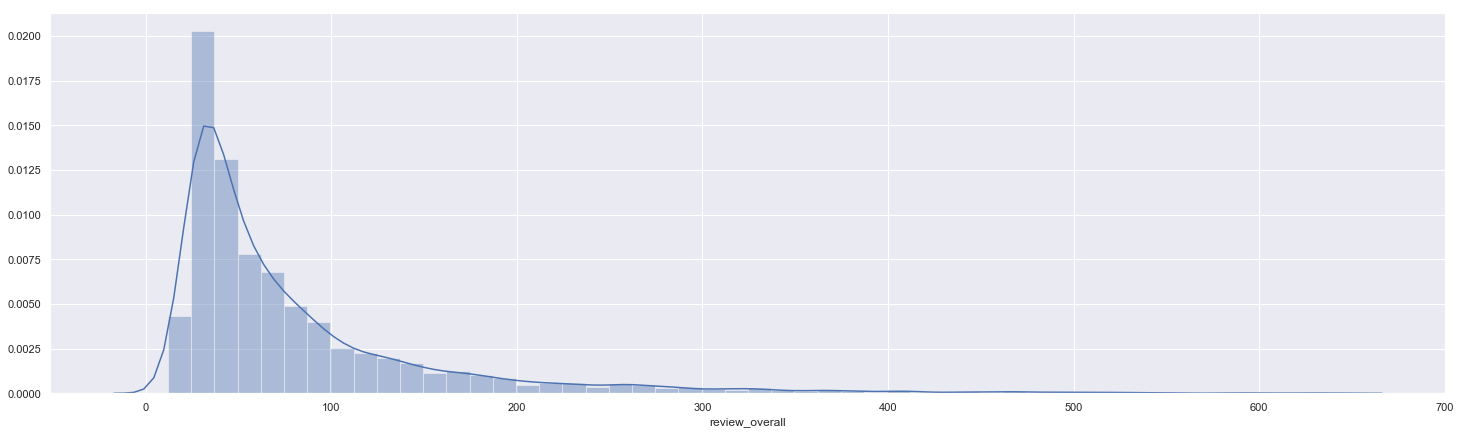

In [331]:
#plot the distribution for reviews count group by beerids
sns.distplot(ratings_final.groupby('beer_beerid').review_overall.count())

In [332]:
ratings_final.groupby('beer_beerid').review_overall.count().mean()

81.47223038495446

The average number of ratings given to the beers is 81.4

### 2.2.4 The average number of ratings given by the users

In [333]:
ratings_final.groupby('review_profilename').review_overall.count()

review_profilename
0110x011            32
05Harley            34
100floods           36
1759Girl            46
1Adam12             24
1fastz28           110
321jeff             14
32hoss32            31
3Vandoo             49
4000qtrap           41
4DAloveofSTOUT      59
51mmz0rz            43
57md                24
7ways               31
86sportster883      26
99bottles           76
9InchNails          79
ABOWMan             28
AChamberlain        64
ADR                270
ADZA               115
AEK                 31
AJacob81            24
AKBelgianBeast     195
ALESwhatCURESya     89
ATLbeerDog          74
ATPete             133
AWolfAtTheDoor      40
AaronHomoya         71
AaronRed            67
                  ... 
yeagerbm            34
yeahnatenelson     157
yeastsipper         26
yelterdow          149
yemenmocha         230
yen157              76
yesyouam           236
youngblood          31
younger35          165
youngleo            38
youradhere          32
yourefragile   

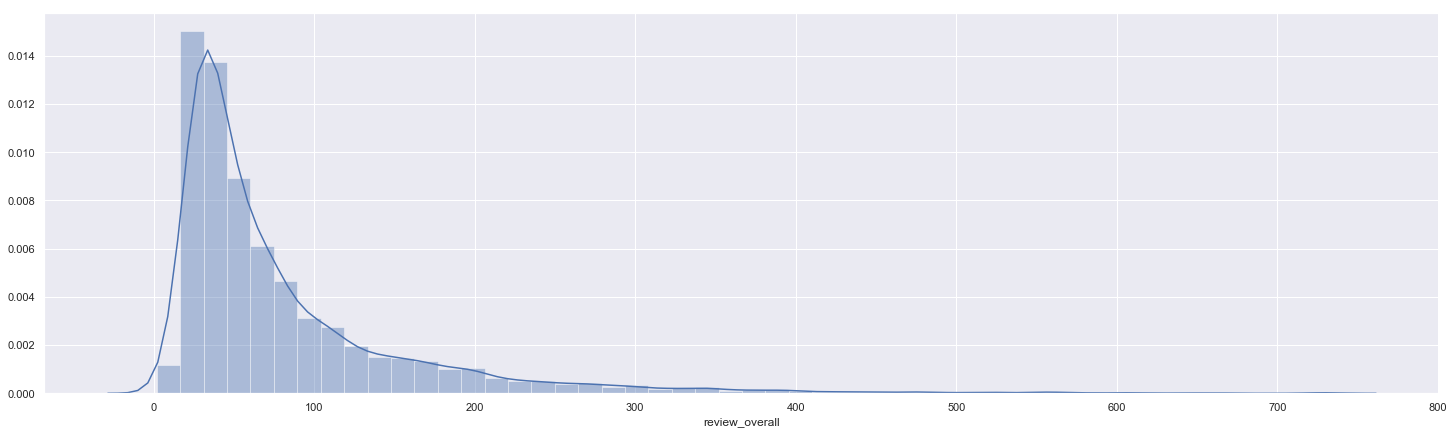

In [334]:
#plot the distribution for reviews count group by profile names
sns.distplot(ratings_final.groupby('review_profilename').review_overall.count())

In [335]:
ratings_final.groupby('review_profilename').review_overall.count().mean()

81.20972466315173

The average number of ratings given by the users is 81.2

## 3. Recommendation Models

## 3.1 Divide your data into training and testing dataset.

In [336]:
ratings_cp= ratings_final

In [337]:
ratings_final['review_profilename'].value_counts()

BuckeyeNation      731
mikesgroove        728
northyorksammy     664
brentk56           641
WesWes             612
BEERchitect        603
ChainGangGuy       582
feloniousmonk      565
TheManiacalOne     562
oberon             556
russpowell         552
jwc215             546
NeroFiddled        529
zeff80             520
Wasatch            519
WVbeergeek         511
Thorpe429          498
tempest            487
Knapp85            479
Billolick          476
akorsak            474
Gueuzedude         467
Phyl21ca           459
Zorro              451
Gavage             446
Bighuge            440
rhoadsrage         432
Georgiabeer        428
Halcyondays        427
drabmuh            421
                  ... 
PaulStoneAnchor     13
revdrjbob           13
rjimlad             13
fido                13
burnheartsMKE       13
Parrotshake         13
rodenbach99         12
Asgeirr             12
Grunewald           12
Otterburn           12
cpolking            12
Everydayoff         12
fostachild 

In [338]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(ratings_final, test_size=0.30, random_state=31)

In [339]:
print(train.shape)
print(test.shape)

(194075, 3)
(83175, 3)


In [340]:
train.head()

,beer_beerid,review_profilename,review_overall
95004,63422,BarrytheBear,4.5
63626,1381,Taelec,3.5
144093,22227,juhl31,5.0
132622,680,geexploitation,4.0
53769,46923,atsprings,4.0


In [341]:
train.reset_index(inplace=True,drop=True)
test.reset_index(inplace=True,drop=True)

In [342]:
train.head()

,beer_beerid,review_profilename,review_overall
0,63422,BarrytheBear,4.5
1,1381,Taelec,3.5
2,22227,juhl31,5.0
3,680,geexploitation,4.0
4,46923,atsprings,4.0


In [343]:
# pivot ratings into beer features
df_beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [344]:
df_beer_features.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Adam12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Copy train and test dataset
These dataset will be used for prediction and evaluation. 
- Dummy train will be used later for prediction of the beers which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction. 
- Dummy test will be used for evaluation. To evaluate, we will only make prediction on the beers rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [345]:
dummy_train = train.copy()
dummy_test = test.copy()

In [346]:
dummy_train['review_overall'] = dummy_train['review_overall'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['review_overall'] = dummy_test['review_overall'].apply(lambda x: 1 if x>=1 else 0)

In [347]:
# The movies not rated by user is marked as 1 for prediction. 
dummy_train = dummy_train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(1)

# The movies not rated by user is marked as 0 for evaluation. 
dummy_test = dummy_test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).fillna(0)

In [348]:
dummy_train.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
100floods,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1759Girl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1Adam12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [349]:
dummy_test.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Adam12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.2 Build user-based and item-based models.

### User Similarity Matrix

#### Using Cosine Similarity

In [350]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_beer_features, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1.         0.         0.         ... 0.         0.11811975 0.        ]
 [0.         1.         0.03966712 ... 0.         0.0565332  0.        ]
 [0.         0.03966712 1.         ... 0.03269721 0.03302795 0.        ]
 ...
 [0.         0.         0.03269721 ... 1.         0.03976513 0.        ]
 [0.11811975 0.0565332  0.03302795 ... 0.03976513 1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [351]:
user_correlation.shape

(3414, 3414)

## Using adjusted Cosine 

### Here, not removing the NaN values and calculating the mean only for the beers rated by the user

In [352]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [353]:
beer_features.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Normalising the rating of the beer for each user aroung 0 mean

In [354]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted_user = (beer_features.T-mean).T

In [355]:
df_subtracted_user.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Finding cosine similarity

In [356]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_correlation = 1 - pairwise_distances(df_subtracted_user.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   6.81111177e-02  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -2.40533215e-04 ...  0.00000000e+00
   3.07012406e-02  0.00000000e+00]
 [ 0.00000000e+00 -2.40533215e-04  1.00000000e+00 ... -3.69285513e-02
   2.97653168e-03  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -3.69285513e-02 ...  1.00000000e+00
   1.63228137e-03  0.00000000e+00]
 [ 6.81111177e-02  3.07012406e-02  2.97653168e-03 ...  1.63228137e-03
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


## Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [357]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06811112,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03070124,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00297653,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00163228,
        0.        ],
       [0.06811112, 0.03070124, 0.00297653, ..., 0.00163228, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

Rating predicted by the user (for beers rated as well as not rated) is the weighted sum of correlation with the beer rating (as present in the rating dataset). 

In [358]:
user_correlation.shape

(3414, 3414)

In [359]:
beer_features.shape

(3414, 3403)

In [360]:
user_predicted_ratings = np.dot(user_correlation, beer_features.fillna(0))
user_predicted_ratings

array([[0.79650385, 3.05725264, 1.6664602 , ..., 2.5472034 , 1.36574928,
        1.55756942],
       [2.01186403, 3.92741552, 2.71517427, ..., 4.16188469, 0.98374491,
        3.17825261],
       [0.90367499, 0.99883446, 0.96198862, ..., 1.90291657, 0.45941231,
        2.28243471],
       ...,
       [5.26343128, 6.75918706, 5.88909252, ..., 3.44932443, 1.39293335,
        2.47201537],
       [2.99252542, 8.30987328, 4.77585435, ..., 4.82601575, 1.20446565,
        2.34962983],
       [1.84778078, 6.65319389, 4.23953595, ..., 1.76682405, 1.27604978,
        1.65693825]])

In [361]:
user_predicted_ratings.shape

(3414, 3403)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero. 

In [362]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.796504,3.057253,1.666460,0.201062,2.923575,0.316759,0.670485,0.616117,2.563246,2.319213,...,0.233217,0.507999,0.471861,0.277456,0.628819,0.617660,0.583159,2.547203,1.365749,1.557569
05Harley,2.011864,3.927416,2.715174,0.543168,3.454846,0.141887,0.602922,0.449296,3.432250,2.299490,...,2.525507,0.497967,0.692096,0.624642,1.527093,0.785405,0.662734,4.161885,0.983745,3.178253
100floods,0.903675,0.998834,0.961989,0.018661,2.278914,0.336044,0.314883,0.185163,1.877369,0.791796,...,0.381073,0.747198,0.705754,0.319328,0.270683,1.168793,0.185222,1.902917,0.459412,2.282435
1759Girl,3.069759,4.344425,4.245553,0.608076,5.252248,0.635428,0.832429,0.990989,6.404990,5.064333,...,2.177697,1.627451,0.963279,0.862611,1.326689,1.383910,0.846593,2.933314,1.531405,1.833215
1Adam12,0.955698,1.526803,1.048899,0.282710,3.261646,0.139641,0.474922,0.749815,1.715701,2.838192,...,0.484359,0.484786,0.191811,0.212630,0.423472,0.941413,0.201255,1.432143,0.305826,1.046944


### Finding the top 5 recommendation for the user 1 

In [363]:
user_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
1904     21.292579
1093     20.109912
412      20.034598
19960    17.313667
11757    16.988126
Name: 05Harley, dtype: float64

# Item Based Similarity

Using Correlation

Taking the transpose of the rating matrix to normalize the rating around the mean for different beer ID. In the user based similarity, we had taken mean for each user intead of each beer. 

In [364]:
beer_features = train.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

beer_features.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1Adam12,1fastz28,321jeff,32hoss32,3Vandoo,4000qtrap,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalising the user rating for each beer

In [365]:
mean = np.nanmean(beer_features, axis=1)
df_subtracted_item = (beer_features.T-mean).T

In [366]:
df_subtracted_item.head()

review_profilename,0110x011,05Harley,100floods,1759Girl,1Adam12,1fastz28,321jeff,32hoss32,3Vandoo,4000qtrap,...,zerk,zerofear13,zhanson88,zimm421,zjungleist,zoolzoo,zoso1967,zoso493,zrab11,zymurgy4all
beer_beerid,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,-0.197842,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.275943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,-1.238095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity. Note that since the data is normalised, both the cosine metric and correlation metric will give the same value. 

In [367]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted_item.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.00000000e+00  1.96223219e-02  3.63333100e-03 ... -7.39414911e-04
  -2.33124082e-03 -1.41978730e-03]
 [ 1.96223219e-02  1.00000000e+00 -1.57843664e-02 ...  0.00000000e+00
   4.92773402e-02  2.88051667e-03]
 [ 3.63333100e-03 -1.57843664e-02  1.00000000e+00 ...  1.99196445e-03
   0.00000000e+00  3.11201257e-02]
 ...
 [-7.39414911e-04  0.00000000e+00  1.99196445e-03 ...  1.00000000e+00
   6.06311200e-03 -3.69259554e-03]
 [-2.33124082e-03  4.92773402e-02  0.00000000e+00 ...  6.06311200e-03
   1.00000000e+00 -1.57653201e-02]
 [-1.41978730e-03  2.88051667e-03  3.11201257e-02 ... -3.69259554e-03
  -1.57653201e-02  1.00000000e+00]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [368]:
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.01962232, 0.00363333, ..., 0.        , 0.        ,
        0.        ],
       [0.01962232, 1.        , 0.        , ..., 0.        , 0.04927734,
        0.00288052],
       [0.00363333, 0.        , 1.        , ..., 0.00199196, 0.        ,
        0.03112013],
       ...,
       [0.        , 0.        , 0.00199196, ..., 1.        , 0.00606311,
        0.        ],
       [0.        , 0.04927734, 0.        , ..., 0.00606311, 1.        ,
        0.        ],
       [0.        , 0.00288052, 0.03112013, ..., 0.        , 0.        ,
        1.        ]])

# Prediction

In [369]:
item_predicted_ratings = np.dot((beer_features.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.41245573, 1.10787089, 0.70993548, ..., 0.6165682 , 2.11867833,
        0.87569283],
       [0.85144619, 0.86362349, 0.83723474, ..., 0.9052507 , 1.10582951,
        0.85772551],
       [0.71558195, 0.65654476, 0.77279271, ..., 0.87117766, 2.95723571,
        0.74767431],
       ...,
       [2.40684028, 1.74929472, 1.84496526, ..., 0.60200217, 1.90968126,
        1.48241447],
       [1.41368259, 1.05321921, 2.76215384, ..., 1.53311481, 2.84329114,
        1.44873917],
       [1.20090569, 0.95268482, 1.4948626 , ..., 0.25349931, 1.14538972,
        0.85267397]])

In [370]:
item_predicted_ratings.shape

(3414, 3403)

In [371]:
beer_features.shape

(3403, 3414)

### Filtering the rating only for the beers not rated by the user for recommendation

In [372]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.412456,1.107871,0.709935,0.321902,0.635990,0.145404,0.446709,0.387237,0.793764,0.413055,...,0.368885,1.128652,1.233005,0.949458,1.276767,0.446116,0.522714,0.616568,2.118678,0.875693
05Harley,0.851446,0.863623,0.837235,0.330437,1.217318,0.823728,0.565141,0.628321,1.052454,0.737814,...,0.623646,1.025866,0.647659,1.192210,0.265348,0.284544,0.771247,0.905251,1.105830,0.857726
100floods,0.715582,0.656545,0.772793,1.029652,0.795790,0.536866,0.208122,0.809894,1.580583,0.380621,...,0.630659,0.753023,1.127464,1.032843,0.636812,0.405214,0.673315,0.871178,2.957236,0.747674
1759Girl,1.427652,1.133021,1.329276,1.381766,1.235097,0.396159,0.726554,1.365293,1.678218,0.820731,...,0.330707,0.514318,0.336931,0.734615,0.979540,0.607905,0.674220,0.552891,0.977408,1.000389
1Adam12,1.135202,0.878061,0.298685,0.253526,0.412756,1.520954,0.505723,0.146697,0.713678,0.596271,...,0.440486,0.838322,1.071185,0.440889,0.513114,0.008503,0.315010,0.843848,2.956021,1.458295


### Top 5 prediction for the user -1

In [373]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beer_beerid
44960    3.282357
54731    3.074701
35225    2.846373
46749    2.622046
34514    2.589872
Name: 05Harley, dtype: float64

## 3.3 Determine how similar the first 10 users are to each other and visualise it.

### The correlation already found can be checked for first 10 users so its for user based similarity

In [374]:
user_correlation

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06811112,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.03070124,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.00297653,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.00163228,
        0.        ],
       [0.06811112, 0.03070124, 0.00297653, ..., 0.00163228, 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [375]:
user_correlation.shape

(3414, 3414)

In [376]:
#Lets copy it for backup
user_correlation_dummy = user_correlation

In [377]:
#As user related to himself is 1 so put 0 in diagonal of matrix
np.fill_diagonal(user_correlation_dummy, 0)

In [378]:
user_correlation_dummy

array([[0.        , 0.        , 0.        , ..., 0.        , 0.06811112,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03070124,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00297653,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00163228,
        0.        ],
       [0.06811112, 0.03070124, 0.00297653, ..., 0.00163228, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [379]:
#function to return indices of maximum n values
def largest_indices(arr, n):
    """Returns the n largest indices from a numpy array."""
    flat = arr.flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    return np.unravel_index(indices, arr.shape)

In [380]:
large_ind = largest_indices(user_correlation_dummy,10)
large_ind

(array([ 272, 1690, 2936, 1944, 3225, 1013, 2441, 1584, 1882, 2103],
       dtype=int64),
 array([1690,  272, 1944, 2936, 1013, 3225, 1584, 2441, 2103, 1882],
       dtype=int64))

In [381]:
#get the values by passing the indices
user_correlation_dummy[largest_indices(user_correlation_dummy, 10)]

array([0.73050894, 0.73050894, 0.66872487, 0.66872487, 0.65795264,
       0.65795264, 0.63630269, 0.63630269, 0.62484353, 0.62484353])

In [382]:
#print the id and user
for i in list(large_ind[0]):
     print(str(i) + "-" + beer_features.columns.get_values()[i])

272-CJfromPhilly
1690-biglobo8971
2936-rjimlad
1944-dbaker61
3225-tippebrewcrew2
1013-OzarkElmo
2441-jushoppy2beer
1584-b3shine
1882-cooch69
2103-fartingdog


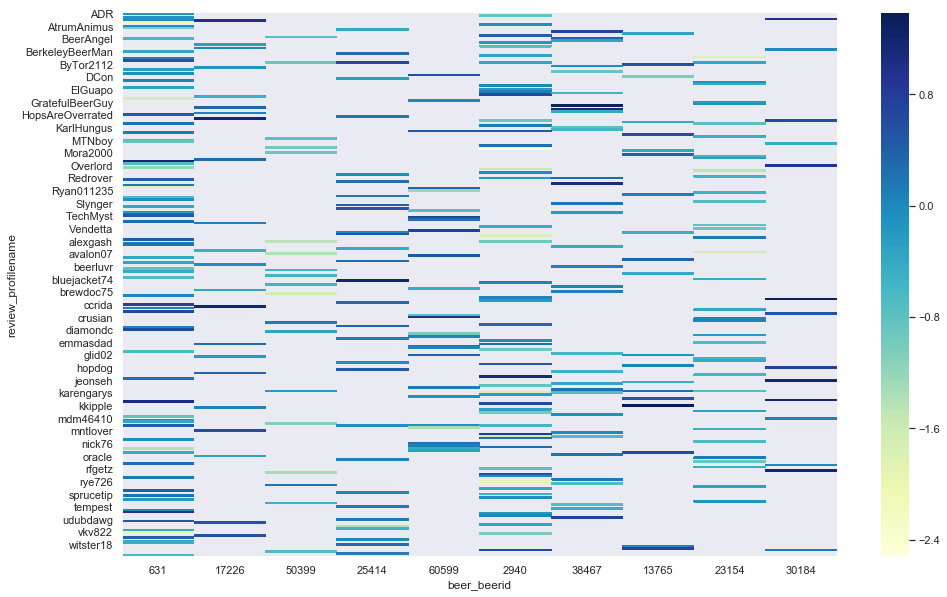

In [383]:
#Lets use the heatmap to visualise the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df_subtracted_user.iloc[:,list(large_ind[0])].dropna(thresh=1), cmap="YlGnBu")
plt.show()

From the above it can be inferred that users like dbarke61 and OzarkEmo, rjimla and tippebreecrew2 are correlated as per user similarity matrix

## 3.4 Compute and visualise the similarity between the first 10 beers

This is for first 10 items so similar to user ones we find from item correlation

In [384]:
item_correlation

array([[1.        , 0.01962232, 0.00363333, ..., 0.        , 0.        ,
        0.        ],
       [0.01962232, 1.        , 0.        , ..., 0.        , 0.04927734,
        0.00288052],
       [0.00363333, 0.        , 1.        , ..., 0.00199196, 0.        ,
        0.03112013],
       ...,
       [0.        , 0.        , 0.00199196, ..., 1.        , 0.00606311,
        0.        ],
       [0.        , 0.04927734, 0.        , ..., 0.00606311, 1.        ,
        0.        ],
       [0.        , 0.00288052, 0.03112013, ..., 0.        , 0.        ,
        1.        ]])

In [385]:
item_correlation.shape

(3403, 3403)

In [386]:
#Lets copy it for backup
item_correlation_dummy = item_correlation

In [387]:
#As user related to himself is 1 so put 0 in diagonal of matrix
np.fill_diagonal(item_correlation_dummy, 0)

In [388]:
item_correlation_dummy

array([[0.        , 0.01962232, 0.00363333, ..., 0.        , 0.        ,
        0.        ],
       [0.01962232, 0.        , 0.        , ..., 0.        , 0.04927734,
        0.00288052],
       [0.00363333, 0.        , 0.        , ..., 0.00199196, 0.        ,
        0.03112013],
       ...,
       [0.        , 0.        , 0.00199196, ..., 0.        , 0.00606311,
        0.        ],
       [0.        , 0.04927734, 0.        , ..., 0.00606311, 0.        ,
        0.        ],
       [0.        , 0.00288052, 0.03112013, ..., 0.        , 0.        ,
        0.        ]])

In [389]:
large_ind = largest_indices(item_correlation_dummy,10)
large_ind

(array([2400, 3325, 3325, 2037, 2755, 3185, 2950, 1568, 2580, 2425],
       dtype=int64),
 array([3325, 2400, 2037, 3325, 3185, 2755, 1568, 2950, 2425, 2580],
       dtype=int64))

In [390]:
#get the values by passing the indices
item_correlation_dummy[largest_indices(item_correlation_dummy, 10)]

array([0.63884452, 0.63884452, 0.63744259, 0.63744259, 0.62577641,
       0.62577641, 0.61846658, 0.61846658, 0.61200579, 0.61200579])

In [391]:
#print the id and item id
for i in list(large_ind[0]):
     print(str(i) + "-" + str(beer_features.T.columns.get_values()[i]))

2400-37398
3325-66113
3325-66113
2037-27859
2755-46085
3185-58675
2950-50869
1568-12973
2580-41690
2425-38149


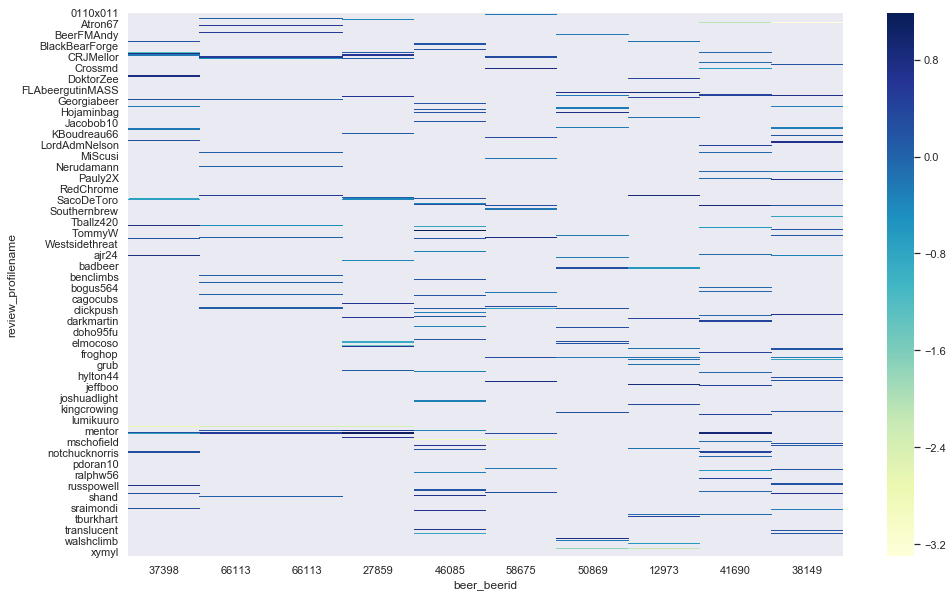

In [392]:
#Lets use the heatmap to visualise the correlation
plt.figure(figsize = (16, 10))
sns.heatmap(df_subtracted_item.iloc[list(large_ind[0]),:].dropna(thresh=1).T, cmap="YlGnBu")
plt.show()

It can be infered that users (shand,sramondi), (Tballz420,ajr24),(jacobob10,beerfmandy) have correlation as per item based similarity index

## 3.5 Compare the performance of the two models using test data and suggest the one that should be deployed.

### Evaluation on Test Data

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the beer already rated by the user insead of predicting it for the beer not rated by the user. 

In [393]:
test.head()

,beer_beerid,review_profilename,review_overall
0,47140,Bung,4.0
1,1056,Birdiebeagle,4.5
2,26541,csiewert,4.0
3,36185,joepais,4.0
4,3842,TheEclecticGent,3.0


## Using User Similarity

In [394]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)
mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.         -0.01726364 ...  0.          0.
   0.        ]
 [ 0.         -0.01726364  1.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [395]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.04858262, 1.02444979, 0.10773434, ..., 0.03333905, 0.37406452,
        0.06660998],
       [0.409135  , 1.40108927, 0.36463356, ..., 0.56492221, 0.53574763,
        0.19257067],
       [0.2069724 , 0.62437796, 0.14088415, ..., 0.28193879, 0.13081013,
        0.03144689],
       ...,
       [1.20992653, 2.01417478, 2.01657676, ..., 0.34551221, 0.        ,
        1.17380448],
       [0.5087724 , 2.00304784, 0.7453776 , ..., 0.60518615, 0.07994134,
        0.88997048],
       [0.2843944 , 1.02873243, 0.        , ..., 0.        , 0.67234581,
        0.        ]])

### Doing prediction for the beers rated by the user

In [396]:
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)

In [397]:
test_user_final_rating.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Adam12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating the RMSE for only the beers rated by user. For  RMSE, normalising the rating to (1,5) range.

In [398]:
test_user_final_rating.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Adam12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [399]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

In [400]:
X  = test_user_final_rating.copy() 
X = X[X>0]
X.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100floods,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759Girl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1Adam12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [401]:
#Replace all Nan with mean values
scaler = MinMaxScaler(feature_range=(1, 5))
X = X.fillna(X.mean())
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]
 [2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]
 [2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]
 ...
 [2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]
 [2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]
 [2.05393348 2.87169717 2.05663914 ... 2.50073056 3.64974576 3.59438698]]


In [402]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [403]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [404]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.147062187726912


#### Using Item Similarity

In [405]:
test_beer_features = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [406]:
test_item_correlation.shape

(3401, 3401)

In [407]:
test_beer_features.shape

(3401, 3410)

In [408]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beer_beerid,5,6,7,9,10,11,14,15,17,19,...,74323,74390,74530,74548,74579,74827,74904,74986,75013,75086
review_profilename,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100floods,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1759Girl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1Adam12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [409]:
test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

In [410]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_item_final_rating.copy() 
X = X[X>0]
X = X.fillna(X.mean())
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))


test_ = test.pivot_table(
    index='review_profilename',
    columns='beer_beerid',
    values='review_overall'
)

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MinMaxScaler(copy=True, feature_range=(1, 5))


### Finding RMSE

In [411]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

0.18627880518759246


#### RMSE for User Based Collaborative test data : 0.147
#### RMSE for Item Based Collaborative test data : 0.186

#### Therefore User Based model is more effective and should be preferred to deployed

## 3.6 Give the names of the top 5 beers that you would recommend to the users 'cokes', 'genog' and 'giblet' using both the models.

In [412]:
#Top 5 beer recommendations to Cokes using User Collaborative Model
user_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]

beer_beerid
412     28.279276
1013    27.555591
34      27.433003
1093    27.218072
276     26.744975
Name: cokes, dtype: float64

In [413]:
#Top 5 beer recommendations to genog using User Collaborative Model
user_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]

beer_beerid
1093    33.399756
2093    32.802383
276     30.862092
412     27.982895
1904    27.827366
Name: genog, dtype: float64

In [414]:
#Top 5 beer recommendations to giblet using User Collaborative Model
user_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]

beer_beerid
355     40.932433
2093    40.825389
104     39.699852
1093    39.556491
92      39.029407
Name: giblet, dtype: float64

In [415]:
#Top 5 beer recommendations to Cokes using Item Collaborative Model
item_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]

beer_beerid
28268    18.470550
24905    17.364322
2081     16.892858
54413    16.832429
33467    16.490284
Name: cokes, dtype: float64

In [416]:
#Top 5 beer recommendations to genog using Item Collaborative Model
item_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]

beer_beerid
11922    5.649166
2508     5.513185
206      5.318455
46749    5.271737
33467    5.268817
Name: genog, dtype: float64

In [417]:
#Top 5 beer recommendations to giblet using Item Collaborative Model
item_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]

beer_beerid
999      5.649925
46955    5.584728
24905    5.444792
2479     5.337861
8116     5.257703
Name: giblet, dtype: float64